In [398]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

In [399]:
pitchers_df = pd.read_csv('../pitchers/all_pitching_years_1985_to_2017.csv')
pitchers_df.sort_values('ERA', inplace=True)

pitchers_df.shape



(15539, 43)

In [400]:
pitchers_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ID', 'NAME', 'THROWS', 'HEIGHT',
       'WEIGHT', 'YEAR', 'AGE', 'TM', 'LG', 'W', 'L', 'W-L%', 'ERA', 'G', 'GS',
       'GF', 'CG', 'SHO', 'SV', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'IBB', 'SO',
       'HBP', 'BK', 'WP', 'BF', 'ERA+', 'FIP', 'WHIP', 'H9', 'HR9', 'BB9',
       'SO9', 'SO/W', 'AWARDS', 'SALARY'],
      dtype='object')

In [401]:
del pitchers_df['Unnamed: 0.1']

In [402]:
del pitchers_df['Unnamed: 0']
del pitchers_df['AWARDS']

In [403]:
pitchers_df.columns

Index(['ID', 'NAME', 'THROWS', 'HEIGHT', 'WEIGHT', 'YEAR', 'AGE', 'TM', 'LG',
       'W', 'L', 'W-L%', 'ERA', 'G', 'GS', 'GF', 'CG', 'SHO', 'SV', 'IP', 'H',
       'R', 'ER', 'HR', 'BB', 'IBB', 'SO', 'HBP', 'BK', 'WP', 'BF', 'ERA+',
       'FIP', 'WHIP', 'H9', 'HR9', 'BB9', 'SO9', 'SO/W', 'SALARY'],
      dtype='object')

In [404]:
columns_of_interest = ['NAME', 'YEAR', 'AGE', 'TM',
       'ERA', 'GS', 'CG', 'SV', 'IP', 'H',
       'R', 'ER', 'HR', 'BB', 'SO', 'BF', 'SALARY']

#remove these weird ERAs
pitchers_df[columns_of_interest].tail(10)

,NAME,YEAR,AGE,TM,ERA,GS,CG,SV,IP,H,R,ER,HR,BB,SO,BF,SALARY
1570,Billy Brewer,1998,30.0,PHI,108.000000,0.0,0.0,0.0,0.1,3.0,4.0,4.0,0.0,2.0,0.0,6.0,"$310,000"
2148,David Carpenter,2013,25.0,LAA,108.000000,0.0,0.0,0.0,0.1,2.0,4.0,4.0,1.0,2.0,1.0,5.0,"$493,000"
14071,Lino Urdaneta,2004,24.0,DET,inf,0.0,0.0,0.0,0.0,5.0,6.0,6.0,0.0,1.0,0.0,6.0,"$300,000"
5533,Bryan Harvey,1995,32.0,FLA,inf,0.0,0.0,0.0,0.0,2.0,3.0,3.0,1.0,1.0,0.0,3.0,"$4,875,000"
10637,Matt Perisho,2005,30.0,BOS,inf,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,"$475,000"
6763,Nate Jones,2014,28.0,CHW,inf,0.0,0.0,0.0,0.0,2.0,4.0,4.0,0.0,3.0,0.0,5.0,"$545,000"
5251,Shane Halter,2000,30.0,DET,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,"$236,000"
7523,Mark Leiter,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11105,Scott Radinsky,2000,32.0,STL,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,"$2,500,000"
14281,Brayan Villarreal,2013,26.0,BOS,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,"$502,500"


In [405]:
#Drop the 8 rows with inf/NAN ERAs
pitchers_df.drop(pitchers_df.tail(8).index,inplace=True)

In [406]:
pitchers_df[columns_of_interest].describe()

,YEAR,AGE,ERA,GS,CG,SV,IP,H,R,ER,HR,BB,SO,BF
count,15531.000000,15531.000000,15531.000000,15531.000000,15531.000000,15531.000000,15531.000000,15531.000000,15531.000000,15531.000000,15531.000000,15531.000000,15531.000000,15531.000000
mean,2001.980362,29.073530,4.807684,9.346855,0.578456,2.539051,82.452134,82.462044,41.861116,38.263924,9.139721,30.001223,61.113772,354.874380
std,9.208849,4.255658,3.643990,12.267166,1.598678,7.574532,65.546595,65.261100,32.623653,29.904597,7.950162,22.511125,51.054748,275.386501
min,1985.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1995.000000,26.000000,3.340000,0.000000,0.000000,0.000000,32.100000,33.000000,17.000000,15.000000,3.000000,13.000000,22.000000,142.000000
50%,2002.000000,28.000000,4.250000,1.000000,0.000000,0.000000,64.000000,61.000000,31.000000,28.000000,7.000000,24.000000,48.000000,274.000000
75%,2010.000000,32.000000,5.400000,19.000000,0.000000,1.000000,120.200000,125.000000,65.000000,59.000000,13.000000,43.000000,84.000000,522.000000
max,2017.000000,49.000000,108.000000,40.000000,24.000000,62.000000,293.200000,284.000000,160.000000,145.000000,50.000000,152.000000,372.000000,1231.000000


In [407]:
pitchers_df = pd.get_dummies(pitchers_df, columns=['THROWS'])

In [408]:
# When a player is traded mid season, they have multiple rows
# To handle these cases we will keep the 'total' row (TOT) but use the 
pitchers_df[pitchers_df.NAME == 'Bert Blyleven'].sort_values(['YEAR','BF'])[columns_of_interest].head(3)


,NAME,YEAR,AGE,TM,ERA,GS,CG,SV,IP,H,R,ER,HR,BB,SO,BF,SALARY
1258,Bert Blyleven,1985,34.0,MIN,3.00,14.0,9.0,0.0,114.0,101.0,45.0,38.0,9.0,26.0,77.0,460.0,"$650,000"
1257,Bert Blyleven,1985,34.0,CLE,3.26,23.0,15.0,0.0,179.2,163.0,76.0,65.0,14.0,49.0,129.0,743.0,"$650,000"
1256,Bert Blyleven,1985,34.0,TOT,3.16,37.0,24.0,0.0,293.2,264.0,121.0,103.0,23.0,75.0,206.0,1203.0,"$650,000"


In [409]:
# If a pitcher switches team mid season, BR generates a row for every team played on plus a 'TOT' row
# The BF count will be highest in the TOT row.
# Create a subset for ID/Year to find dupes, sort by DF, and delete everything but the highest count row
pitchers_df = pitchers_df.sort_values('BF').drop_duplicates(subset=['ID', 'YEAR'], keep='last')

In [410]:
pitchers_df[pitchers_df.NAME == 'Bert Blyleven'].sort_values(['YEAR','BF'])[columns_of_interest].head(3)

,NAME,YEAR,AGE,TM,ERA,GS,CG,SV,IP,H,R,ER,HR,BB,SO,BF,SALARY
1256,Bert Blyleven,1985,34.0,TOT,3.16,37.0,24.0,0.0,293.2,264.0,121.0,103.0,23.0,75.0,206.0,1203.0,"$650,000"
1259,Bert Blyleven,1986,35.0,MIN,4.01,36.0,16.0,0.0,271.2,262.0,134.0,121.0,50.0,58.0,215.0,1126.0,"$1,450,000"
1260,Bert Blyleven,1987,36.0,MIN,4.01,37.0,8.0,0.0,267.0,249.0,132.0,119.0,46.0,101.0,196.0,1122.0,"$1,150,000"


In [411]:
pitchers_df['BF'].describe()

count    12793.000000
mean       391.561166
std        281.686846
min          1.000000
25%        182.000000
50%        300.000000
75%        611.000000
max       1231.000000
Name: BF, dtype: float64

In [412]:
pitchers_df.shape

(12793, 41)

In [413]:
pitchers_df['SALARY'] = pitchers_df['SALARY'].str.replace('$','')
pitchers_df['SALARY'] = pitchers_df['SALARY'].str.replace(',','')
pitchers_df['SALARY'] = pitchers_df['SALARY'].astype('int64')

In [414]:
#Consider dropping these rows. Is a pitcher with less than 30 batters faced a reliable metric?
pitchers_df[pitchers_df.BF < 30][columns_of_interest].head(10)

,NAME,YEAR,AGE,TM,ERA,GS,CG,SV,IP,H,R,ER,HR,BB,SO,BF,SALARY
10187,Lyle Overbay,2014,37.0,MIL,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1500000
9572,Joe Nathan,2015,40.0,DET,0.0,0.0,0.0,1.0,0.1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10000000
4408,Sam Fuld,2013,31.0,TBR,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,725000
12116,John Russell,1989,28.0,ATL,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,145000
9835,Abraham Núñez,2004,28.0,PIT,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,625000
3633,Trent Durrington,2004,28.0,MIL,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,305000
12704,Scott Sheldon,2000,31.0,TEX,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,200000
3286,Chris Denorfia,2015,34.0,CHC,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2600000
12634,Kevin Seitzer,1993,31.0,OAK,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,600000
3289,Daniel Descalso,2014,27.0,STL,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1290000


In [415]:
pitchers_df = pitchers_df[pitchers_df.BF >= 30]

In [416]:
pitchers_df['BF'].describe()

count    12244.000000
mean       408.529892
std        276.029354
min         30.000000
25%        202.000000
50%        311.000000
75%        635.000000
max       1231.000000
Name: BF, dtype: float64

In [417]:
pitchers_df[columns_of_interest].corr()

,YEAR,AGE,ERA,GS,CG,SV,IP,H,R,ER,HR,BB,SO,BF,SALARY
YEAR,1.000000,0.049289,-0.002213,-0.055462,-0.263859,-0.006136,-0.103502,-0.108600,-0.109549,-0.095944,-0.012301,-0.156262,0.047370,-0.108365,0.345611
AGE,0.049289,1.000000,-0.040520,-0.051222,-0.015656,0.090216,-0.010140,0.001180,-0.017568,-0.016725,0.014967,-0.089491,-0.038081,-0.013264,0.334746
ERA,-0.002213,-0.040520,1.000000,-0.077356,-0.150326,-0.252640,-0.269942,-0.144119,0.001639,0.017282,-0.011824,-0.150026,-0.335732,-0.235275,-0.090581
GS,-0.055462,-0.051222,-0.077356,1.000000,0.571870,-0.288351,0.926114,0.933267,0.915073,0.913205,0.834698,0.803133,0.797070,0.933204,0.291748
CG,-0.263859,-0.015656,-0.150326,0.571870,1.000000,-0.136752,0.632593,0.581965,0.514576,0.503838,0.435652,0.482458,0.542800,0.618088,0.078417
SV,-0.006136,0.090216,-0.252640,-0.288351,-0.136752,1.000000,-0.141982,-0.192768,-0.231645,-0.233243,-0.198378,-0.153664,-0.037440,-0.155594,0.075064
IP,-0.103502,-0.010140,-0.269942,0.926114,0.632593,-0.141982,1.000000,0.969714,0.912475,0.907089,0.828224,0.848599,0.897090,0.997479,0.276624
H,-0.108600,0.001180,-0.144119,0.933267,0.581965,-0.192768,0.969714,1.000000,0.964093,0.959998,0.861424,0.822652,0.811160,0.980486,0.258297
R,-0.109549,-0.017568,0.001639,0.915073,0.514576,-0.231645,0.912475,0.964093,1.000000,0.995820,0.894190,0.848955,0.749618,0.935086,0.228207
ER,-0.095944,-0.016725,0.017282,0.913205,0.503838,-0.233243,0.907089,0.959998,0.995820,1.000000,0.901042,0.843673,0.747415,0.929615,0.235013


In [418]:
yearly_summed_bins = pitchers_df.groupby(['YEAR']).sum()
yearly_mean_bins = pitchers_df.groupby(['YEAR']).mean()
yearly_std_bins = pitchers_df.groupby(['YEAR']).std()
yearly_summed_bins

,HEIGHT,WEIGHT,AGE,L,W-L%,ERA,G,GS,GF,CG,...,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,SALARY,THROWS_Left,THROWS_Right
YEAR,,,,,,,,,,,,,,,,,,,,,
1985,15995,41416,6295.0,1645.0,106.807,829.86,8315.0,3482.0,2614.0,587.0,...,839.92,289.857,1888.6,187.0,719.9,1161.2,388.61,98225666,67.0,148.0
1986,21936,56737,8393.0,1926.0,140.163,1196.54,10495.0,3918.0,3276.0,563.0,...,1185.01,410.876,2641.4,265.0,1057.1,1749.2,536.52,114359020,92.0,203.0
1987,21559,56058,8219.0,1872.0,142.406,1257.43,10571.0,3828.0,3197.0,551.0,...,1257.44,410.497,2649.7,309.6,1045.0,1755.1,531.72,111289574,100.0,190.0
1988,23269,60196,8910.0,1967.0,141.200,1260.23,10547.0,4005.0,3286.0,608.0,...,1211.26,427.600,2796.2,252.3,1053.3,1775.5,584.76,121390295,103.0,210.0
1989,22171,57663,8556.0,1882.0,139.234,1122.39,10662.0,3870.0,3302.0,460.0,...,1100.33,399.421,2593.0,212.4,1002.4,1722.5,566.27,143597292,101.0,197.0
1990,28216,72984,10651.0,2020.0,169.363,1630.88,11956.0,4072.0,3558.0,419.0,...,1555.58,544.840,3506.1,325.4,1398.5,2139.7,674.02,181472005,129.0,251.0
1991,21191,54963,8165.0,1716.0,130.655,1204.18,10431.0,3542.0,3081.0,337.0,...,1166.63,397.894,2557.5,250.9,1023.0,1672.1,531.77,255891170,102.0,183.0
1992,23066,60026,8959.0,1870.0,142.757,1231.12,11470.0,3746.0,3357.0,389.0,...,1199.88,427.851,2758.0,235.7,1093.8,1765.9,567.53,336760318,99.0,211.0
1993,28702,74729,10948.0,2121.0,180.765,1710.53,13238.0,4349.0,3736.0,363.0,...,1663.82,558.295,3613.1,353.6,1412.7,2284.7,711.07,378034668,123.0,263.0


In [419]:
yearly_summed_bins.columns

Index(['HEIGHT', 'WEIGHT', 'AGE', 'L', 'W-L%', 'ERA', 'G', 'GS', 'GF', 'CG',
       'SHO', 'SV', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'IBB', 'SO', 'HBP', 'BK',
       'WP', 'BF', 'ERA+', 'FIP', 'WHIP', 'H9', 'HR9', 'BB9', 'SO9', 'SO/W',
       'SALARY', 'THROWS_Left', 'THROWS_Right'],
      dtype='object')

<Container object of 33 artists>

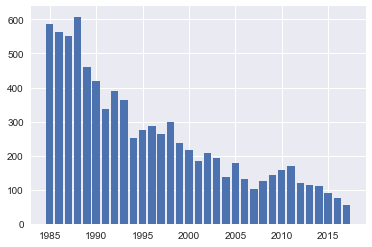

In [420]:
#Maybe throw away 1994 due to the player's strike


plt.bar(yearly_summed_bins.index, yearly_summed_bins['CG'])

In [421]:
pitchers_df['LG_SALARY_YEAR'] = pitchers_df.groupby(['YEAR'])['SALARY'].transform(lambda x: x.sum())
pitchers_df['ADJ_SALARY'] = pitchers_df['SALARY'].div(pitchers_df['LG_SALARY_YEAR'])
columns_of_interest.append('LG_SALARY_YEAR')

pitchers_df[columns_of_interest].sample(20)

,NAME,YEAR,AGE,TM,ERA,GS,CG,SV,IP,H,R,ER,HR,BB,SO,BF,SALARY,LG_SALARY_YEAR
2431,Jason Christiansen,2005,35.0,TOT,5.12,0.0,0.0,0.0,45.2,55.0,28.0,26.0,4.0,17.0,21.0,208.0,1050000,895113743
4865,Mark Grant,1987,23.0,TOT,4.24,25.0,2.0,1.0,163.1,170.0,88.0,77.0,22.0,73.0,90.0,720.0,87500,111289574
4259,Chad Fox,2005,34.0,CHC,6.75,0.0,0.0,1.0,8.0,8.0,6.0,6.0,2.0,8.0,11.0,38.0,575000,895113743
2,David Aardsma,2008,26.0,BOS,5.55,0.0,0.0,0.0,48.2,49.0,32.0,30.0,4.0,35.0,49.0,228.0,403250,1081197147
9040,Blas Minor,1995,29.0,NYM,3.66,0.0,0.0,1.0,46.2,44.0,21.0,19.0,6.0,13.0,43.0,192.0,145000,355124846
4786,Tom Gordon,1992,24.0,KCR,4.59,11.0,0.0,0.0,117.2,116.0,67.0,60.0,9.0,55.0,98.0,516.0,815000,336760318
5502,Pep Harris,1997,24.0,ANA,3.62,0.0,0.0,0.0,79.2,82.0,33.0,32.0,7.0,38.0,56.0,346.0,157500,425391607
3107,Mark Davis,1990,29.0,KCR,5.11,3.0,0.0,6.0,68.2,71.0,43.0,39.0,9.0,52.0,73.0,334.0,2125000,181472005
7766,Esteban Loaiza,1996,24.0,PIT,4.96,10.0,1.0,0.0,52.2,65.0,32.0,29.0,11.0,19.0,32.0,236.0,150000,342426562
7789,Kyle Lobstein,2016,26.0,PIT,3.96,0.0,0.0,0.0,25.0,25.0,11.0,11.0,2.0,12.0,15.0,110.0,520000,1599566275


In [422]:
pitchers_df[columns_of_interest].sample(20)


,NAME,YEAR,AGE,TM,ERA,GS,CG,SV,IP,H,R,ER,HR,BB,SO,BF,SALARY,LG_SALARY_YEAR
9516,Randy Myers,1992,29.0,SDP,4.29,0.0,0.0,38.0,79.2,84.0,38.0,38.0,7.0,34.0,66.0,348.0,525000,336760318
13667,Julio Teheran,2014,23.0,ATL,2.89,33.0,4.0,0.0,221.0,188.0,82.0,71.0,22.0,51.0,186.0,884.0,800000,1444955277
11110,Brad Radke,1999,26.0,MIN,3.75,33.0,4.0,0.0,218.2,239.0,97.0,91.0,28.0,44.0,121.0,910.0,2225000,611715166
1121,Dellin Betances,2017,29.0,NYY,2.87,0.0,0.0,10.0,59.2,29.0,20.0,19.0,3.0,44.0,100.0,261.0,3000000,1735765619
3179,Justin De Fratus,2014,26.0,PHI,2.39,0.0,0.0,0.0,52.2,45.0,19.0,14.0,4.0,12.0,49.0,219.0,513000,1444955277
11908,José Román,1986,23.0,CLE,6.55,5.0,0.0,0.0,22.0,23.0,20.0,16.0,3.0,17.0,9.0,105.0,60000,114359020
7432,Cliff Lee,2003,24.0,CLE,3.61,9.0,0.0,0.0,52.1,41.0,28.0,21.0,7.0,20.0,44.0,210.0,300900,801539812
9846,Ed Núñez,1994,31.0,OAK,12.00,0.0,0.0,0.0,15.0,26.0,20.0,20.0,2.0,10.0,15.0,80.0,430000,374257462
14552,John Wasdin,1999,26.0,BOS,4.12,0.0,0.0,2.0,74.1,66.0,38.0,34.0,14.0,18.0,57.0,302.0,500000,611715166
14708,Todd Wellemeyer,2008,29.0,STL,3.71,32.0,0.0,0.0,191.2,178.0,84.0,79.0,25.0,62.0,134.0,807.0,1000000,1081197147


In [423]:
pitchers_df.columns = pitchers_df.columns.str.upper()

In [424]:
pitchers_df.columns

Index(['ID', 'NAME', 'HEIGHT', 'WEIGHT', 'YEAR', 'AGE', 'TM', 'LG', 'W', 'L',
       'W-L%', 'ERA', 'G', 'GS', 'GF', 'CG', 'SHO', 'SV', 'IP', 'H', 'R', 'ER',
       'HR', 'BB', 'IBB', 'SO', 'HBP', 'BK', 'WP', 'BF', 'ERA+', 'FIP', 'WHIP',
       'H9', 'HR9', 'BB9', 'SO9', 'SO/W', 'SALARY', 'THROWS_LEFT',
       'THROWS_RIGHT', 'LG_SALARY_YEAR', 'ADJ_SALARY'],
      dtype='object')

In [425]:
counting_stats = ['W','L','G','CG','SV','IP','H','ER','HR','BB','SO','BF']
prob_stats = ['ERA','ERA+','FIP','WHIP','H9', 'HR9', 'BB9', 'SO9', 'SO/W']
physical_stats = ['AGE','HEIGHT','WEIGHT','THROWS_LEFT','THROWS_RIGHT']
salary_stats = ['SALARY','LG_SALARY_YEAR']

pair_plot_columns = ['YEAR', 'AGE', 
       'ERA', 'GS', 'FIP', 'WHIP', 'IP', 'H', 'HR', 'SALARY', 'LG_SALARY_YEAR']



In [426]:
# Let's remove all pitchers with null prob stats
null_prob_stats = pitchers_df[pitchers_df[prob_stats + ['NAME', 'YEAR', 'IP']].isnull().any(axis=1)][prob_stats + ['NAME', 'YEAR', 'IP']]
null_prob_stats

,ERA,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,NAME,YEAR,IP
2273,3.86,103.0,3.56,1.429,12.9,1.3,0.0,6.4,NaN,Xavier Cedeño,2014,7.0
5119,0.00,NaN,3.58,1.000,5.0,0.0,4.0,4.0,1.00,Eric Gunderson,1994,9.0
3856,2.00,246.0,3.03,0.778,7.0,1.0,0.0,7.0,NaN,Bart Evans,1998,9.0
12587,11.05,40.0,6.84,1.773,16.0,3.7,0.0,7.4,NaN,Evan Scribner,2017,7.1
1753,9.00,49.0,4.42,2.000,18.0,1.3,0.0,2.6,NaN,Kirk Bullinger,1998,7.0
10175,0.00,NaN,1.49,0.484,2.6,0.0,1.7,11.3,6.50,Adam Ottavino,2015,10.1
7912,11.37,40.0,8.03,2.842,25.6,4.3,0.0,5.7,NaN,Wilton López,2014,6.1
7006,0.00,NaN,3.42,0.857,2.9,0.0,4.8,6.8,1.40,Mark Kiefer,1993,9.1
11913,3.72,140.0,2.31,1.345,12.1,0.0,0.0,3.7,NaN,J.C. Romero,1999,9.2
6910,0.00,NaN,2.16,0.789,5.0,0.0,2.1,7.1,3.33,Shawn Kelley,2011,12.2


In [427]:
pitchers_df = pitchers_df[~pitchers_df[prob_stats].isnull().any(axis=1)]
pitchers_df.shape

(12228, 43)

In [428]:

pitchers_df.to_csv('cleaned_pitching_years_1985_to_2017.csv')



In [429]:

pitchers_df[pitchers_df.SALARY < 1000000]['SALARY'].describe()

count      7507.000000
mean     375833.002931
std      225821.635001
min       60000.000000
25%      180000.000000
50%      355000.000000
75%      510000.000000
max      990000.000000
Name: SALARY, dtype: float64